In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import mediapy as media
import numpy as np
from diffusers import DDIMScheduler

try:
    from local_sd_pipeline import LocalStableDiffusionPipeline
    from optim_utils import *
except ModuleNotFoundError:
    import os; os.chdir("..")
    from local_sd_pipeline import LocalStableDiffusionPipeline
    from optim_utils import *

%load_ext autoreload
%autoreload 2

In [2]:
# load model
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model_id = "CompVis/stable-diffusion-v1-4"

pipe = LocalStableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    safety_checker=None,
    requires_safety_checker=False,
)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

In [3]:
num_inference_steps = 50
guidance_scale = 7.5
num_images_per_prompt = 4
image_size = 512

In [4]:
prompt = "Emma Watson to play Belle in Disney's <i>Beauty and the Beast</i>"
print(prompt)
seed = 0

Emma Watson to play Belle in Disney's <i>Beauty and the Beast</i>


## Before Mitigation

  0%|          | 0/50 [00:00<?, ?it/s]

prompt: Emma Watson to play Belle in Disney's <i>Beauty and the Beast</i>


,,,

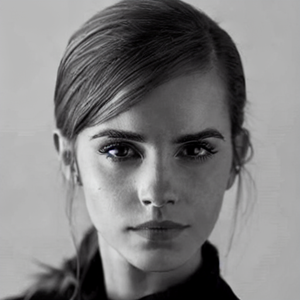
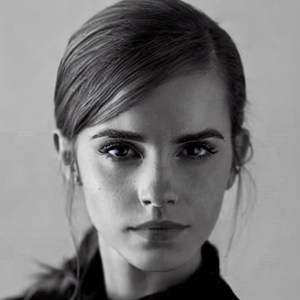
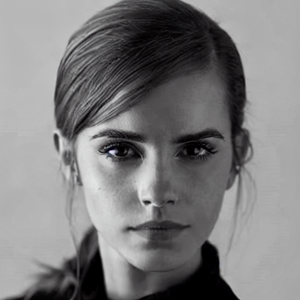
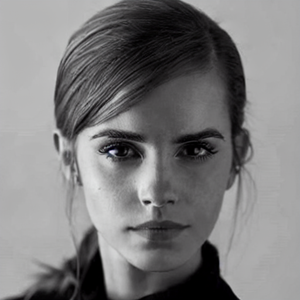

In [5]:
set_random_seed(seed)

outputs, track_stats = pipe(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    track_noise_norm=True,
)
outputs = outputs.images

print(f"prompt: {prompt}")
media.show_images(outputs, width=300)

## After Mitigation

In [6]:
auged_prompt_embeds = pipe.aug_prompt(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    target_steps=[0],
    lr=0.05,
    optim_iters=10,
    target_loss=3,
    print_optim=True,
)

  0%|          | 0/50 [00:00<?, ?it/s]

step: 0, curr loss: 9.625
step: 1, curr loss: 6.0625
step: 2, curr loss: 2.875


  0%|          | 0/50 [00:00<?, ?it/s]

prompt: Emma Watson to play Belle in Disney's <i>Beauty and the Beast</i>


,,,

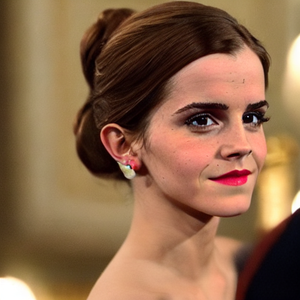
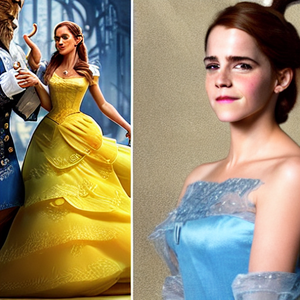
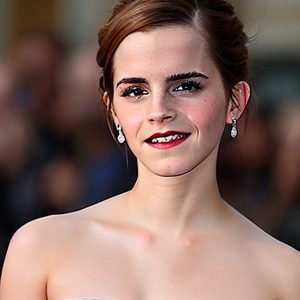
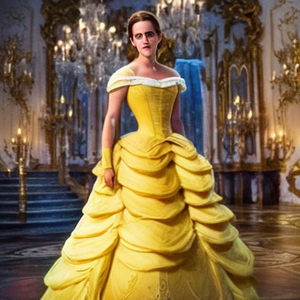

In [7]:
set_random_seed(seed)

outputs, track_stats = pipe(
    prompt_embeds=auged_prompt_embeds,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    track_noise_norm=True,
    height=image_size,
    width=image_size,
)
outputs = outputs.images

print(f"prompt: {prompt}")
media.show_images(outputs, width=300)